In [ ]:
#%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import os
import numpy as np
#import numpy as np
import matplotlib.pyplot as plt

from skimage import data
#from skimage.color import rgb2hed,  hed2rgb

# prompt: load image with skimage

from skimage import io, color
from skimage.exposure import rescale_intensity
import SimpleITK as sitk
from skimage.metrics import structural_similarity as ssim


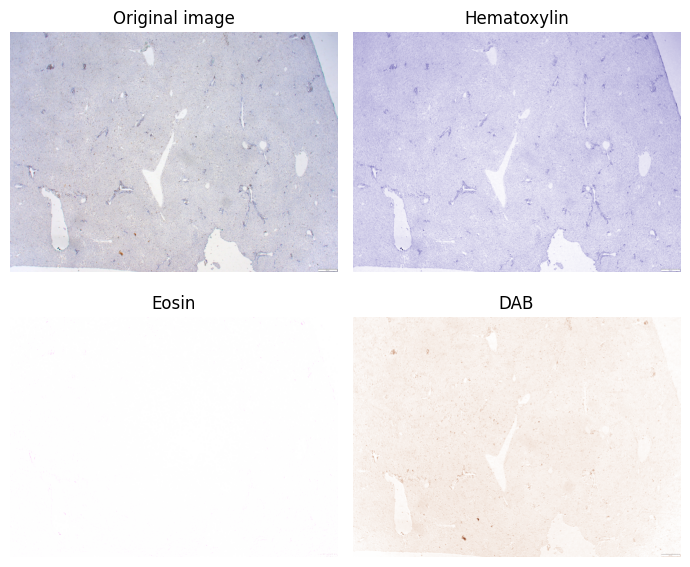

In [ ]:
#vein_path = "Liver Vein Contours\veins.py"
#contour_path = "Liver Vein Contours\contours.py"

ihc_rgb = io.imread('Normal liver 02_25/1.25x CD3.jpg') 
# Replace 'path/to/your/image.jpg' with the actual path to your image file

print(ihc_rgb.shape)  # Print the dimensions of the loaded image
# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Now we can easily manipulate the hematoxylin and DAB channels:



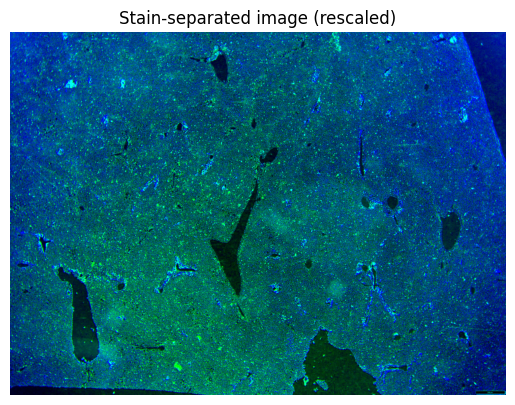

In [ ]:

# Rescale hematoxylin and DAB channels and give them a fluorescence look
h = rescale_intensity(
    ihc_hed[:, :, 0],
    out_range=(0, 1),
    in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)),
)
d = rescale_intensity(
    ihc_hed[:, :, 2],
    out_range=(0, 1),
    in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)),
)

# Cast the two channels into an RGB image, as the blue and green channels
# respectively
zdh = np.dstack((null, d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title('Stain-separated image (rescaled)')
axis.axis('off')
plt.show()
plt.savefig()

(3000, 4096, 3)


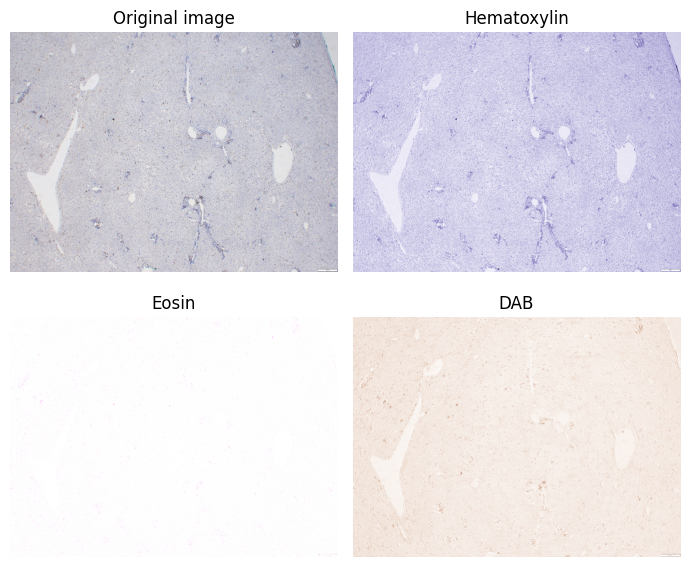

In [13]:
#vein_path = "Liver Vein Contours\veins.py"
#contour_path = "Liver Vein Contours\contours.py"

ihc_rgb = io.imread('Normal liver 02_25/2x CD3.jpg') 
# Replace 'path/to/your/image.jpg' with the actual path to your image file

print(ihc_rgb.shape)  # Print the dimensions of the loaded image
# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

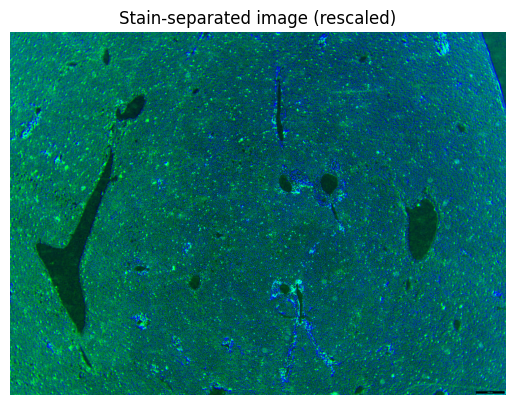

In [14]:

# Rescale hematoxylin and DAB channels and give them a fluorescence look
h = rescale_intensity(
    ihc_hed[:, :, 0],
    out_range=(0, 1),
    in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)),
)
d = rescale_intensity(
    ihc_hed[:, :, 2],
    out_range=(0, 1),
    in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)),
)

# Cast the two channels into an RGB image, as the blue and green channels
# respectively
zdh = np.dstack((null, d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title('Stain-separated image (rescaled)')
axis.axis('off')
plt.show()

In [23]:
apap_folder_path = 'APAP 02_24'
normal_folder_path = 'Normal liver 02_25'
#output_dir = 'test_output'

# Loop through folder path and run compute vision processes for all images
for image in os.listdir(normal_folder_path):
    img_path = os.path.join(normal_folder_path, image)
    output_dir = os.path.join('test_output_neon', img_path)
    os.makedirs(output_dir)

    #vein_path = "Liver Vein Contours\veins.py"
    #contour_path = "Liver Vein Contours\contours.py"

    ihc_rgb = io.imread(img_path) 
    # Replace 'path/to/your/image.jpg' with the actual path to your image file

    print(ihc_rgb.shape)  # Print the dimensions of the loaded image
    # Separate the stains from the IHC image
    ihc_hed = rgb2hed(ihc_rgb)

    # Create an RGB image for each of the stains
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
    ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))
    
    # Rescale hematoxylin and DAB channels and give them a fluorescence look
    h = rescale_intensity(
        ihc_hed[:, :, 0],
        out_range=(0, 1),
        in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)),
    )
    d = rescale_intensity(
        ihc_hed[:, :, 2],
        out_range=(0, 1),
        in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)),
    )

    # Cast the two channels into an RGB image, as the blue and green channels
    # respectively
    zdh = np.dstack((null, d, h))

    fig = plt.figure()
    axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
    axis.imshow(zdh)
    axis.set_title(f'{image} - Stain-separated image')
    axis.axis('off')
    # Save neon image
    plt.savefig(os.path.join(output_dir, 'processed.png'))
    plt.close()
    print(f"Processed image saved at {output_dir}")

(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\1.25x CD163.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\1.25x CD20.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\1.25x CD3.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\1.25x CD68.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\1.25x CK7.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\1.25x normal.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\2x CD163.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\2x CD20.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\2x CD3.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\2x CD68.jpg
(3000, 4096, 3)
Processed image saved at test_output_neon\Normal liver 02_25\2x CK7.jpg
(30

registration

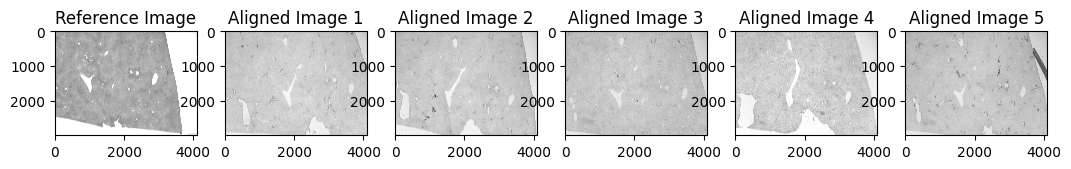

In [ ]:

# ---- Load Images ----
image_paths = ["Normal liver 02_25\\1.25x normal.jpg", "Normal liver 02_25\\1.25x CD3.jpg", "Normal liver 02_25\\1.25x CD20.jpg", "Normal liver 02_25\\1.25x CD68.jpg", "Normal liver 02_25\\1.25x CD163.jpg", "Normal liver 02_25\\1.25x CK7.jpg"]  # List your IHC-stained images
mask_paths = ["test_output\\Normal liver 02_25\\1.25x normal.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD3.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD20.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD68.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD163.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CK7.jpg\\contour_mask.png"]  # Corresponding masks

# Select the first image as the reference (fixed)
fixed_image = io.imread(image_paths[0])
fixed_mask = io.imread(mask_paths[0], as_gray=True) > 0.5  # Convert to binary

# Convert to grayscale (if needed)
fixed_gray = color.rgb2gray(fixed_image) if fixed_image.ndim == 3 else fixed_image

# Convert to SimpleITK format
sitk_fixed = sitk.GetImageFromArray(fixed_gray.astype(np.float32))
sitk_fixed_mask = sitk.GetImageFromArray(fixed_mask.astype(np.float32))

# Storage for registered images
registered_images = []

# ---- Process Each Moving Image ----
for i in range(1, len(image_paths)):
    moving_image = io.imread(image_paths[i])
    moving_mask = io.imread(mask_paths[i], as_gray=True) > 0.5  # Convert to binary

    # Convert to grayscale (if needed)
    moving_gray = color.rgb2gray(moving_image) if moving_image.ndim == 3 else moving_image

    # Convert to SimpleITK format
    sitk_moving = sitk.GetImageFromArray(moving_gray.astype(np.float32))
    sitk_moving_mask = sitk.GetImageFromArray(moving_mask.astype(np.float32))

    # ---- Step 1: Rigid Registration ----
    registration = sitk.ImageRegistrationMethod()
    registration.SetMetricFixedMask(sitk_fixed_mask)
    registration.SetMetricMovingMask(sitk_moving_mask)
    registration.SetMetricAsMattesMutualInformation()
    registration.SetInterpolator(sitk.sitkLinear)
    registration.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=300)

    # Initialize with translation & rotation
    registration.SetInitialTransform(sitk.CenteredTransformInitializer(
        sitk_fixed, sitk_moving, sitk.Euler2DTransform(), sitk.CenteredTransformInitializerFilter.GEOMETRY
    ))

    rigid_transform = registration.Execute(sitk_fixed, sitk_moving)

    # Apply rigid transform
    moving_rigid = sitk.Resample(sitk_moving, sitk_fixed, rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())

    # ---- Step 2: Non-Rigid Registration (BSpline) ----
    bspline_transform = sitk.BSplineTransformInitializer(moving_rigid, [10, 10])

    registration.SetInitialTransform(bspline_transform, inPlace=True)
    registration.SetMetricAsCorrelation()
    registration.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5, numberOfIterations=500)

    non_rigid_transform = registration.Execute(sitk_fixed, moving_rigid)

    # Apply non-rigid transformation
    final_registered_image = sitk.Resample(sitk_moving, sitk_fixed, non_rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())

    # Convert to NumPy & Store
    registered_images.append(sitk.GetArrayFromImage(final_registered_image))

# ---- Display Results ----
plt.figure(figsize=(15, 5))

plt.subplot(2, len(image_paths) + 1, 1)
plt.imshow(fixed_gray, cmap='gray')
plt.title("Reference Image")

for i, img in enumerate(registered_images):
    plt.subplot(1, len(image_paths) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"Aligned Image {i+1}")

plt.show()


evaluatiokn
* Structural Similarity Index (SSIM) → Measures how similar the registered image is to the reference.

    * Ranges from -1 (completely different) to 1 (perfect match).

    *   Higher SSIM = better alignment.

* Dice Similarity Coefficient (DSC) → Measures how well the masks overlap after registration.

    *   Ranges from 0 (no overlap) to 1 (perfect match).

    *   Higher Dice score = better tissue alignment.

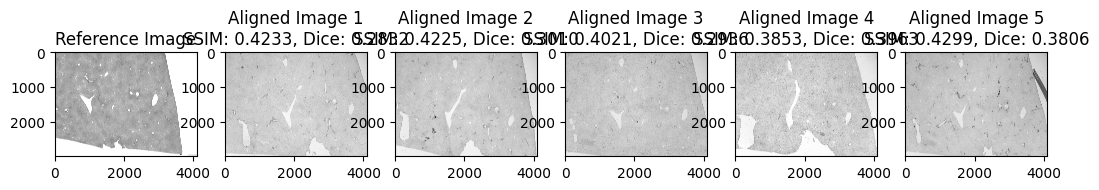

Image 1: SSIM = 0.4233, Dice = 0.2832
Image 2: SSIM = 0.4225, Dice = 0.3010
Image 3: SSIM = 0.4021, Dice = 0.2936
Image 4: SSIM = 0.3853, Dice = 0.3963
Image 5: SSIM = 0.4299, Dice = 0.3806


In [49]:

# ---- Load Images ----
image_paths = ["Normal liver 02_25\\1.25x normal.jpg", "Normal liver 02_25\\1.25x CD3.jpg", "Normal liver 02_25\\1.25x CD20.jpg", "Normal liver 02_25\\1.25x CD68.jpg", "Normal liver 02_25\\1.25x CD163.jpg", "Normal liver 02_25\\1.25x CK7.jpg"]  # List your IHC-stained images
mask_paths = ["test_output\\Normal liver 02_25\\1.25x normal.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD3.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD20.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD68.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD163.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CK7.jpg\\contour_mask.png"]  # Corresponding masks

# Select first image as the fixed reference
fixed_image = io.imread(image_paths[0])
fixed_mask = io.imread(mask_paths[0], as_gray=True) > 0.5  # Convert to binary

# Convert to grayscale if needed
fixed_gray = color.rgb2gray(fixed_image) if fixed_image.ndim == 3 else fixed_image

# Convert to SimpleITK format
sitk_fixed = sitk.GetImageFromArray(fixed_gray.astype(np.float32))
sitk_fixed_mask = sitk.GetImageFromArray(fixed_mask.astype(np.float32))

# Storage for registered images & similarity scores
registered_images = []
ssim_scores = []
dice_scores = []

# ---- Process Each Moving Image ----
for i in range(1, len(image_paths)):
    moving_image = io.imread(image_paths[i])
    moving_mask = io.imread(mask_paths[i], as_gray=True) > 0.5  # Convert to binary

    # Convert to grayscale if needed
    moving_gray = color.rgb2gray(moving_image) if moving_image.ndim == 3 else moving_image

    # Convert to SimpleITK format
    sitk_moving = sitk.GetImageFromArray(moving_gray.astype(np.float32))
    sitk_moving_mask = sitk.GetImageFromArray(moving_mask.astype(np.float32))

    # ---- Step 1: Rigid Registration ----
    registration = sitk.ImageRegistrationMethod()
    registration.SetMetricFixedMask(sitk_fixed_mask)
    registration.SetMetricMovingMask(sitk_moving_mask)
    registration.SetMetricAsMattesMutualInformation()
    registration.SetInterpolator(sitk.sitkLinear)
    registration.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=300)

    registration.SetInitialTransform(sitk.CenteredTransformInitializer(
        sitk_fixed, sitk_moving, sitk.Euler2DTransform(), sitk.CenteredTransformInitializerFilter.GEOMETRY
    ))

    rigid_transform = registration.Execute(sitk_fixed, sitk_moving)
    moving_rigid = sitk.Resample(sitk_moving, sitk_fixed, rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())

    # ---- Step 2: Non-Rigid (BSpline) Registration ----
    bspline_transform = sitk.BSplineTransformInitializer(moving_rigid, [10, 10])

    registration.SetInitialTransform(bspline_transform, inPlace=True)
    registration.SetMetricAsCorrelation()
    registration.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5, numberOfIterations=500)

    non_rigid_transform = registration.Execute(sitk_fixed, moving_rigid)
    final_registered_image = sitk.Resample(sitk_moving, sitk_fixed, non_rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())

    # Convert to NumPy
    registered_np = sitk.GetArrayFromImage(final_registered_image)
    registered_images.append(registered_np)

    # ---- Compute Structural Similarity Index (SSIM) ----
    ssim_value = ssim(fixed_gray, registered_np, data_range=registered_np.max() - registered_np.min())
    ssim_scores.append(ssim_value)

    # ---- Compute Dice Coefficient ----
    registered_mask = sitk.Resample(sitk_moving_mask, sitk_fixed, non_rigid_transform, sitk.sitkNearestNeighbor, 0.0, sitk_moving_mask.GetPixelID())
    registered_mask_np = sitk.GetArrayFromImage(registered_mask)

    intersection = np.sum((fixed_mask * registered_mask_np))
    dice_score = (2.0 * intersection) / (np.sum(fixed_mask) + np.sum(registered_mask_np))
    dice_scores.append(dice_score)

# ---- Display Results ----
plt.figure(figsize=(15, 5))

plt.subplot(1, len(image_paths) + 1, 1)
plt.imshow(fixed_gray, cmap='gray')
plt.title("Reference Image")

for i, img in enumerate(registered_images):
    plt.subplot(1, len(image_paths) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"Aligned Image {i+1}\nSSIM: {ssim_scores[i]:.4f}, Dice: {dice_scores[i]:.4f}")

plt.show()

# ---- Print Scores ----
for i in range(len(ssim_scores)):
    print(f"Image {i+1}: SSIM = {ssim_scores[i]:.4f}, Dice = {dice_scores[i]:.4f}")
